

```
# This is second task from the INternship (DEN)
```



Load the dataset

In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
house_df = pd.read_csv('/content/drive/My Drive/house_data/zameen-updated.csv')
house_df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [6]:
house_df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [7]:
house_df.shape

(168446, 20)

# **Data cleaning and Exploration**

In [8]:
house_df.isnull().sum() # this will calculate the exact massing values

,0
property_id,0
location_id,0
page_url,0
property_type,0
price,0
location,0
city,0
province_name,0
latitude,0
longitude,0


In [9]:
# fill the missing values in agent and agency column
house_df['agent'] = house_df['agent'].fillna('Unknown')
house_df['agency'] = house_df['agency'].fillna('UnKnown')
house_df.isnull().sum()


,0
property_id,0
location_id,0
page_url,0
property_type,0
price,0
location,0
city,0
province_name,0
latitude,0
longitude,0


In [10]:
# check unique values in the column
print(house_df['city'].unique())
print(house_df['area'].unique())



['Islamabad' 'Lahore' 'Faisalabad' 'Rawalpindi' 'Karachi']
['4 Marla' '5.6 Marla' '8 Marla' '2 Kanal' '1.6 Kanal' '1 Kanal'
 '6.2 Marla' '7.1 Marla' '7.8 Marla' '4.5 Kanal' '10 Marla' '3.1 Marla'
 '1.5 Marla' '14 Marla' '5 Marla' '6 Kanal' '8.4 Marla' '4.7 Marla'
 '12 Marla' '4.3 Marla' '17.8 Marla' '6.7 Marla' '5.3 Marla' '2.1 Kanal'
 '2.5 Kanal' '1.2 Kanal' '13.3 Marla' '2.4 Kanal' '16 Marla' '9.3 Marla'
 '9 Marla' '11 Marla' '7.5 Marla' '18 Marla' '3 Marla' '6.5 Kanal'
 '2.5 Marla' '8 Kanal' '1.1 Kanal' '6 Marla' '4.7 Kanal' '9.7 Marla'
 '7 Marla' '3.8 Marla' '5.5 Marla' '1.5 Kanal' '2.4 Marla' '4.4 Marla'
 '2.2 Marla' '4 Kanal' '8.9 Marla' '3.2 Marla' '9.6 Marla' '9.8 Marla'
 '10.2 Marla' '11.4 Marla' '13.1 Marla' '4.8 Marla' '7.6 Marla'
 '5.4 Marla' '13.4 Marla' '13.2 Marla' '5.2 Marla' '1.3 Marla' '6.1 Marla'
 '9.1 Marla' '11.5 Marla' '1.1 Marla' '10.9 Marla' '3.7 Marla' '4.2 Marla'
 '5.8 Marla' '1.3 Kanal' '10.1 Marla' '17 Marla' '2 Marla' '8.2 Marla'
 '10 Kanal' '11.7 Marla' '1

In [11]:
print(house_df.columns)

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')


In [12]:
# consistent features names
# .str.strip()           # remove leading/trailing spaces
 #   .str.lower()           # convert to lowercase
  #  .str.replace(' ', '_') # replace spaces with underscores

house_df.columns = (house_df.columns.str.strip().str.lower())
print(house_df.columns)


Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'area type', 'area size', 'area category'],
      dtype='object')


In [13]:
# validate price
house_df = house_df[house_df['price'] > 0]
#Ensure latitude and longituse is correct
house_df = house_df[(house_df['latitude'].between(-90, 90)) & (house_df['longitude'].between(-180, 180))]


In [14]:
# validate badroos and baths
house_df = house_df[house_df['baths']>=0]
house_df = house_df[house_df['bedrooms']>=0]

In [15]:
 # Checking for duplicate values
duplicates = house_df.duplicated().sum()
print("Number of Duplicates:" , duplicates)

Number of Duplicates: 0


To see if in this data have outliers. If yes, than Handle all outliers.
An outlier is a data point that is significantly different from the majority of the data.
It can be too high or too low, and it can:



Before Handling Outliers In price Column


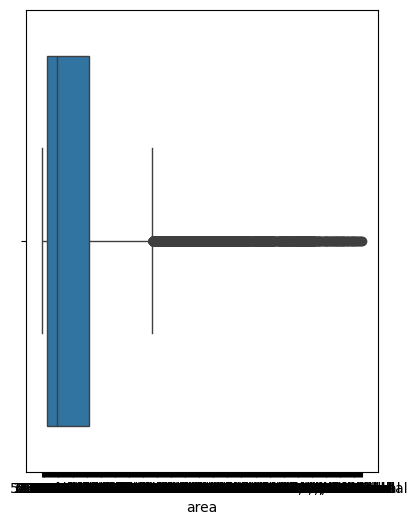

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
sns.boxplot(x= house_df['area'])
print('Before Handling Outliers In price Column')


After Handling Outliers In price Column


<Axes: xlabel='price'>

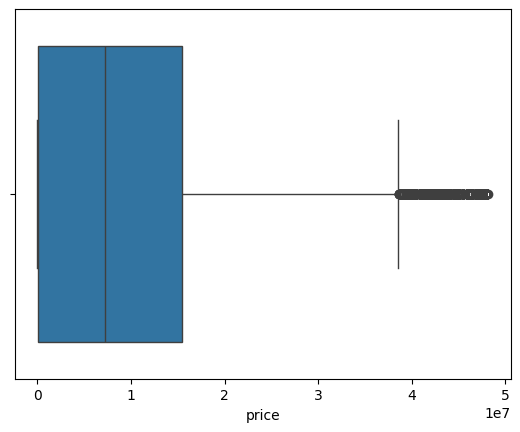

In [17]:
Q1 = house_df['price'].quantile(0.25)
Q3 = house_df['price'].quantile(0.75)

IQR = Q3 - Q1

# house_df = house_df[(house_df['price']) >= (Q1 - 1.5 * IQR ) & (house_df['price']) <= (Q3 + 1.5 * IQR)]
outliers = house_df = house_df[(house_df['price'] >= Q1 - 1.5 * IQR) & (house_df['price'] <= Q3 + 1.5 * IQR)]
print('After Handling Outliers In price Column')
sns.boxplot (x=house_df['price'])

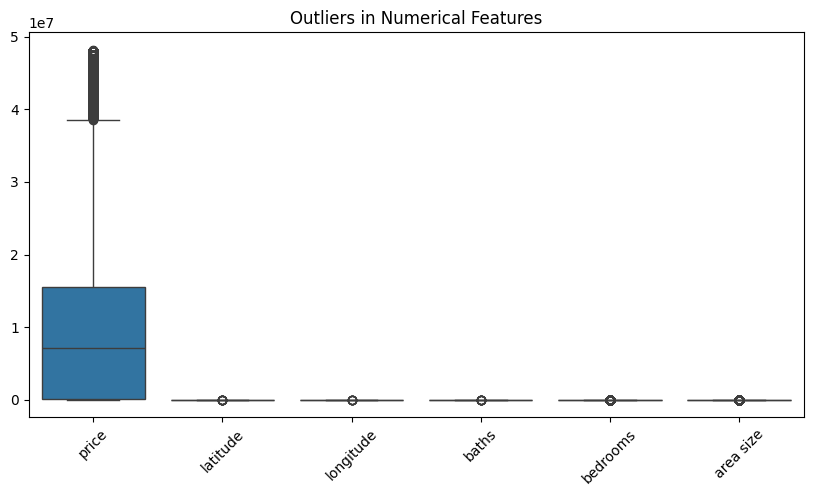

In [18]:
#Outliers in Numerical Features
numricals_columns = ['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'area size']

plt.figure(figsize=(10,5))
sns.boxplot(data=house_df[numricals_columns])
plt.title('Outliers in Numerical Features')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Winsorize numerical columns
house_df['price'] = winsorize(house_df['price'], limits=[0.01, 0.01])
house_df['latitude'] = winsorize(house_df['latitude'], limits=[0.05, 0.05])
house_df['longitude'] = winsorize(house_df['longitude'], limits=[0.05, 0.05])
house_df['baths'] = winsorize(house_df['baths'], limits=[0.05, 0.05])
house_df['bedrooms'] = winsorize(house_df['bedrooms'], limits=[0.05, 0.05])
house_df['area size'] = winsorize(house_df['area size'], limits=[0.05, 0.05])

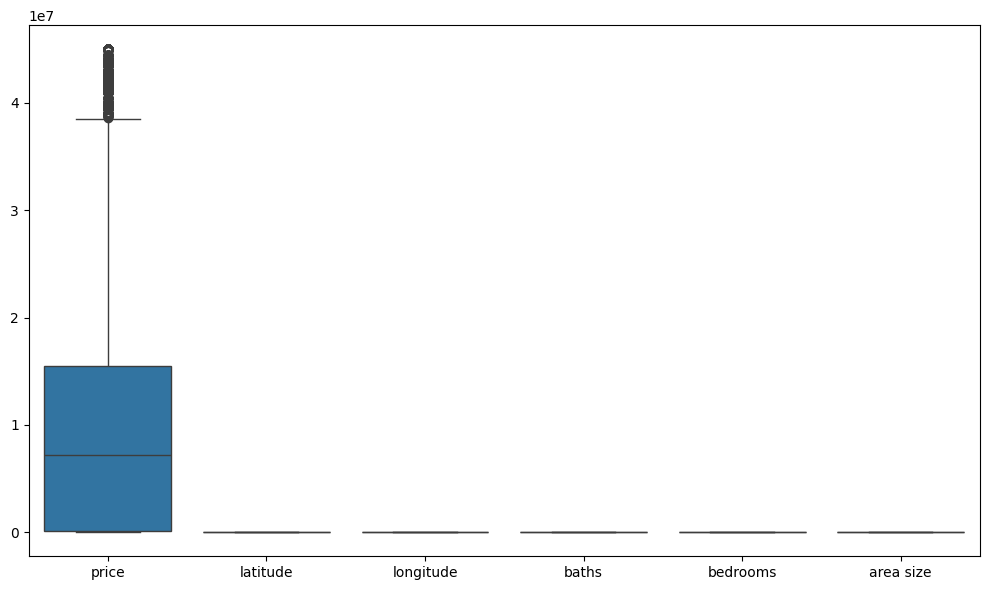

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(house_df[numricals_columns])
plt.tight_layout()
plt.show()

# Data Exploration and Feature Engineering



In [21]:
print("shape:" , house_df.shape)

shape: (154896, 20)


In [22]:
for col in house_df.columns:
    print(f"{col}: {house_df[col].nunique()} unique values")

property_id: 154896 unique values
location_id: 4112 unique values
page_url: 154896 unique values
property_type: 7 unique values
price: 1634 unique values
location: 1491 unique values
city: 5 unique values
province_name: 3 unique values
latitude: 7121 unique values
longitude: 7194 unique values
baths: 7 unique values
area: 309 unique values
purpose: 2 unique values
bedrooms: 7 unique values
date_added: 124 unique values
agency: 5622 unique values
agent: 10072 unique values
area type: 2 unique values
area size: 111 unique values
area category: 19 unique values


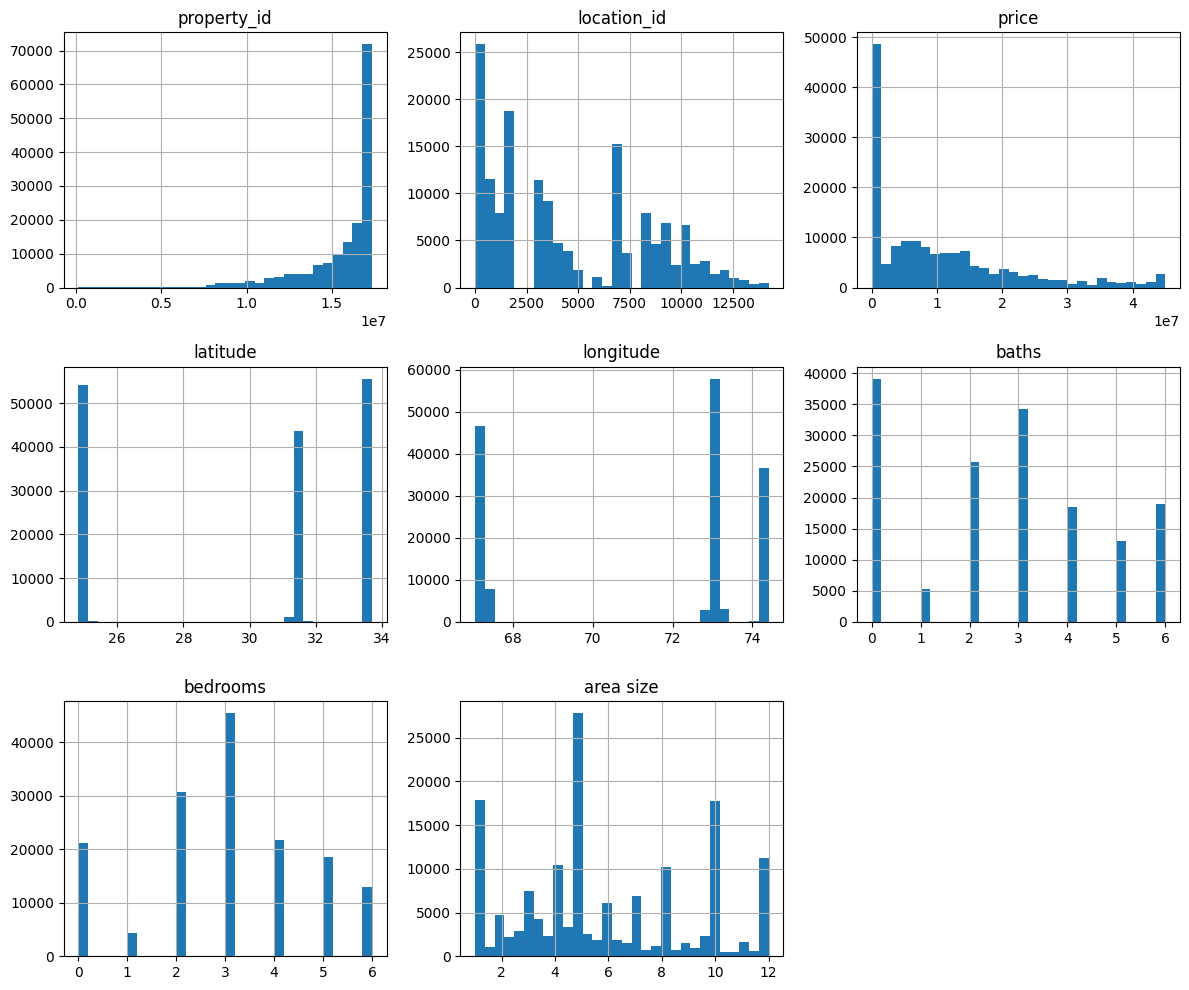

In [23]:
# Visualization

house_df.hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

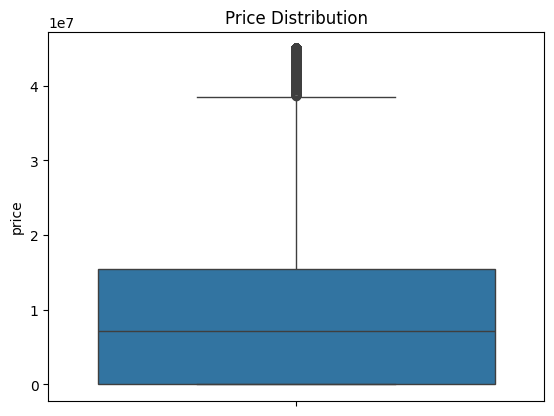

In [24]:
sns.boxplot(data=house_df['price'])
plt.title("Price Distribution")
plt.show()


# Convert Categories columns into numbers form.




In [25]:
#identify categorials columns
#categoricals_col = house_df.select_dtypes(include=['object']).columns
#print(categoricals_col)

In [26]:
#le = LabelEncoder()

#for col in categoricals_col:
    #house_df[col] = le.fit_transform(house_df[col])

categorical_cols = house_df.select_dtypes(include=['object']).columns
le_dict = {}

# Fit label encoders on training data
for col in categorical_cols:
    le = LabelEncoder()
    house_df[col] = le.fit_transform(house_df[col])
    le_dict[col] = le  # Store fitted encoder for future use


In [27]:
house_df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,area type,area size,area category
0,237062,3325,58559,1,10000000,480,1,0,33.679890,73.012640,2,196,1,2,11,5331,9225,1,4.0,0
1,346905,3236,45796,1,6900000,407,1,0,33.698137,72.971492,3,230,1,3,36,5331,9225,1,5.6,12
2,386513,764,89138,2,16500000,485,1,0,33.631486,72.926559,6,276,1,5,82,5331,9225,1,8.0,12
3,656161,340,77963,2,43500000,210,1,0,33.698137,73.151199,4,139,1,4,28,5331,9225,0,2.0,1
4,841645,3226,45385,2,7000000,344,1,0,33.492591,73.301339,3,276,1,3,75,1854,5948,1,8.0,12


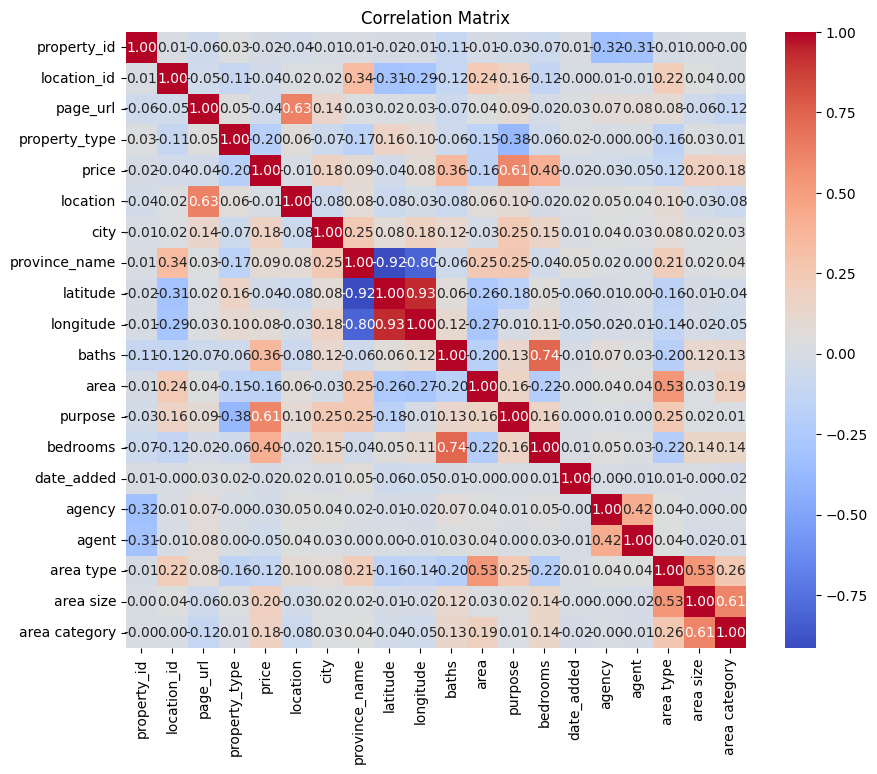

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(house_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


**Drops the unessesary columns**

In [29]:
df_cleaned = house_df.drop(['property_id', 'location_id', 'page_url', 'latitude', 'longitude'], axis=1)


In [30]:
df_cleaned.head()

,property_type,price,location,city,province_name,baths,area,purpose,bedrooms,date_added,agency,agent,area type,area size,area category
0,1,10000000,480,1,0,2,196,1,2,11,5331,9225,1,4.0,0
1,1,6900000,407,1,0,3,230,1,3,36,5331,9225,1,5.6,12
2,2,16500000,485,1,0,6,276,1,5,82,5331,9225,1,8.0,12
3,2,43500000,210,1,0,4,139,1,4,28,5331,9225,0,2.0,1
4,2,7000000,344,1,0,3,276,1,3,75,1854,5948,1,8.0,12


In [31]:
df_cleaned.describe()


,property_type,price,location,city,province_name,baths,area,purpose,bedrooms,date_added,agency,agent,area type,area size,area category
count,154896.000000,1.548960e+05,154896.000000,154896.000000,154896.000000,154896.000000,154896.000000,154896.000000,154896.000000,154896.000000,154896.000000,154896.000000,154896.000000,154896.000000,154896.000000
mean,2.183781,1.042485e+07,574.548400,2.176854,1.126401,2.664265,158.289846,0.691470,2.964660,61.680566,3485.726965,6179.720671,0.869532,5.850321,4.791137
std,1.323166,1.136909e+07,374.244939,1.082692,0.749103,2.005803,94.279582,0.461888,1.707578,24.100411,1785.792092,3119.590667,0.336819,3.281218,5.517114
min,0.000000,1.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.150000e+05,268.000000,1.000000,1.000000,0.000000,45.000000,0.000000,2.000000,47.000000,1924.000000,3433.000000,1.000000,3.300000,0.000000
50%,2.000000,7.200000e+06,480.000000,2.000000,1.000000,3.000000,196.000000,1.000000,3.000000,67.000000,3810.000000,6930.000000,1.000000,5.000000,1.000000
75%,2.000000,1.550000e+07,832.000000,3.000000,2.000000,4.000000,220.000000,1.000000,4.000000,76.000000,5331.000000,9225.000000,1.000000,8.000000,12.000000
max,6.000000,4.500000e+07,1490.000000,4.000000,2.000000,6.000000,308.000000,1.000000,6.000000,123.000000,5621.000000,10071.000000,1.000000,12.000000,18.000000


In [32]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154896 entries, 0 to 168445
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_type  154896 non-null  int64  
 1   price          154896 non-null  int64  
 2   location       154896 non-null  int64  
 3   city           154896 non-null  int64  
 4   province_name  154896 non-null  int64  
 5   baths          154896 non-null  int64  
 6   area           154896 non-null  int64  
 7   purpose        154896 non-null  int64  
 8   bedrooms       154896 non-null  int64  
 9   date_added     154896 non-null  int64  
 10  agency         154896 non-null  int64  
 11  agent          154896 non-null  int64  
 12  area type      154896 non-null  int64  
 13  area size      154896 non-null  float64
 14  area category  154896 non-null  int64  
dtypes: float64(1), int64(14)
memory usage: 18.9 MB


In [33]:
# check corelation with price feature

Correlation = df_cleaned.corr()
print(Correlation['price'].sort_values(ascending=False))

price            1.000000
purpose          0.606920
bedrooms         0.404597
baths            0.355500
area size        0.197996
area category    0.182714
city             0.178425
province_name    0.089214
location        -0.005236
date_added      -0.023038
agency          -0.031586
agent           -0.053058
area type       -0.121252
area            -0.160998
property_type   -0.198863
Name: price, dtype: float64


# so according to corr result drops these unnessasiry columns as well



In [34]:
selected_columns = ['price', 'purpose', 'bedrooms', 'baths', 'area size', 'city', 'area category']
df_selected = df_cleaned[selected_columns]


#Now time is to train the machine learning model
#1 Linear Regression





In [35]:
features = ['purpose', 'bedrooms', 'baths', 'area category', 'city', 'area size']
target = 'price'

X = df_selected[features]
y = df_selected[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 65650644279901.875
R-squared: 0.4923451293938249


In [36]:
#Random Forest
rf_model = RandomForestRegressor( random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [37]:

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)



# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("RAndom Forest MSE:", mse_rf)
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

mse_gb = mean_squared_error(y_test, gb_pred)
print("RAndom Forest MSE:", mse_gb)
print("Gradient Boosting R2:", r2_score(y_test, gb_pred))


RAndom Forest MSE: 21140516160493.004
Random Forest R2: 0.8365273317007138
RAndom Forest MSE: 25144318569897.688
Gradient Boosting R2: 0.8055672426357346


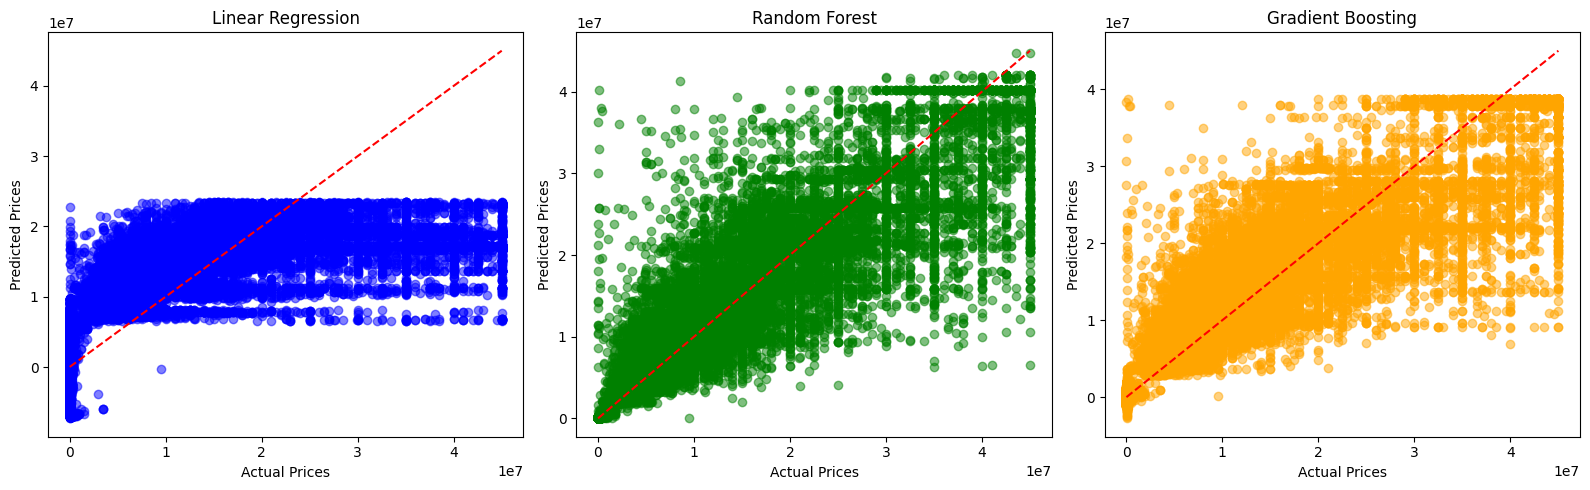

In [38]:
plt.figure(figsize=(16, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.title('Linear Regression')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.title('Random Forest')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Gradient Boosting
plt.subplot(1, 3, 3)
plt.scatter(y_test, gb_pred, alpha=0.5, color='orange')
plt.title('Gradient Boosting')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.tight_layout()
plt.show()


# so from the graph we see that Random forest work well but it Predictions are more spread out and closer to the red dashed line.

#Still shows some bias and clumping — possibly due to the nature of decision trees creating step-like predictions.

#More consistent and follows the actual trend better than linear regression.

#so we improved performances by log Transform#

In [39]:
df_cleaned['log_price'] = np.log(df_cleaned['price'])
X = df_cleaned.drop(['price', 'log_price'], axis=1)  # drop original price columns
y = df_cleaned['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_log = rf_model.predict(X_test)


# 6. Convert predictions back to original scale
y_pred_original = np.exp(y_pred_log)
y_test_original = np.exp(y_test)  # important: convert y_test too

# 7. Evaluate
mse_rf = mean_squared_error(y_test_original, y_pred_original)
r2_rf = r2_score(y_test_original, y_pred_original)

print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)



Random Forest MSE: 11220455155835.787
Random Forest R2: 0.9132359054087456


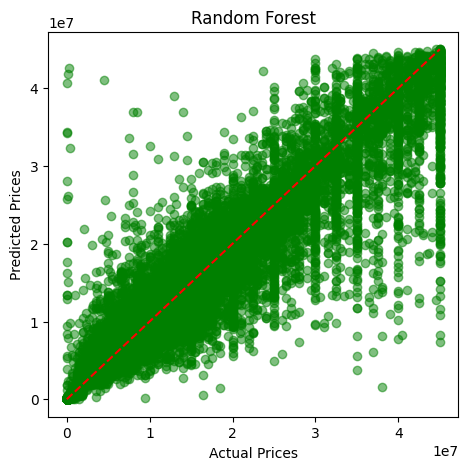

In [40]:
# Random Forest
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 2)
plt.scatter(y_test_original, y_pred_original, alpha=0.5, color='green')
plt.title('Random Forest')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--')


# FUTURE PRICE PRIDICTION

In [48]:
import numpy as np
import pandas as pd

# Your future input data (example)
future_data = pd.DataFrame([{
    'purpose': 'For Sale',
    'bedrooms': 3,
    'baths': 2,
    'area category': '0-5 Marla',
    'city': 'Karachi',
    'area size': 150,
}])

# Step 1: Encode categorical columns
for col in categorical_cols:
    if col in future_data.columns:
        le = le_dict.get(col)
        if le:
            try:
                future_data[col] = le.transform(future_data[col])
            except ValueError as e:
                print(f"ValueError for column '{col}':", e)
                # Handle unseen labels by setting to -1 or a default known value
                future_data[col] = future_data[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Step 2: Apply log transform to numeric columns (same as training)
numeric_cols = ['area size']  # Update this list based on what you transformed
for col in numeric_cols:
    if col in future_data.columns:
        future_data[col] = np.log1p(future_data[col])  # log1p for safety with 0

# Step 3: Reorder columns to match training
future_data = future_data.reindex(columns=model.feature_names_in_, fill_value=0)

# Step 4: Predict
prediction = model.predict(future_data)
print("Predicted price (in log):", prediction)
print("Predicted price (actual):", np.expm1(prediction))  # reverse log1p if needed


Predicted price (in log): [13365163.89749014]
Predicted price (actual): [inf]


/tmp/ipython-input-2768443901.py:38: RuntimeWarning: overflow encountered in expm1
  print("Predicted price (actual):", np.expm1(prediction))  # reverse log1p if needed
